<a href="https://colab.research.google.com/github/microprediction/microprediction/blob/master/blog/NFL_2nd_and_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/microprediction/nflMarkov/master/inputData/pbp_nfldb_2009_2013.csv')

This notebook seeks to destroy 100 years of American football strategy by showing that players should not try to get the first down. Not always.

Well, actually this agrees entirely with the views of at least some offensive coordinators who reviewed the analysis. 

But we have a way to go before convincing every player, commentator, or fan. 

There is an article at https://www.microprediction.com/blog/nine which you are welcome to comment on. 

### Question (1) Should you run or pass on third and 1 ??

This is a little side question I was curious about. We need some facts about 3rd and 1 in what follows. The result is maybe slightly counter-intuitive but hardly revolutionary. 

In [2]:
df['got_1'] = df['yds']>=1
records = df.to_dict(orient='records')
third_and_1 = df[['dwn','ytg','yfog','type','got_1']].loc[(df['dwn']==3) & (df['ytg']==1) & (df['yfog']<50),:]
third_and_1.groupby(by=['type']).mean()

,dwn,ytg,yfog,got_1
type,,,,
PASS,3.0,1.0,33.500000,0.609804
RUSH,3.0,1.0,33.281056,0.721273


Sure looks like you should RUSH ... even though the other team knows this. But this doesn't account for catching the other team off guard with a huge running play. By the way the mean yardage gains are 3.5 for run and 7.75 for passing...

In [6]:
third_and_1_unconditional = df[['dwn','ytg','got_1','yds','type']].loc[(df['dwn']==3) & (df['ytg']==1) & (df['yfog']<50),:]
third_and_1_unconditional.mean()
third_and_1_unconditional.groupby(by=['type']).mean()


,dwn,ytg,got_1,yds
type,,,,
PASS,3.0,1.0,0.609804,7.756863
RUSH,3.0,1.0,0.721273,3.484472


However the mean yardage gains aren't important to us. What matters is the conditional mean yardage gains .. the gain when we make the first down. 

In [ ]:
third_and_1_got_it = df[['dwn','ytg','yfog','type','yds']].loc[(df['dwn']==3) & (df['ytg']==1) & (df['yfog']<50) & df['got_1']==True,:]
third_and_1_got_it.groupby(by=['type']).mean()

,dwn,ytg,yfog,yds
type,,,,
PASS,3.0,1.0,33.315113,12.755627
RUSH,3.0,1.0,33.399354,5.022605


So when completing a third and 1, we get an average of 7.75 more yards on the pass compared to the run. Thus the question becomes, would you sacrifice 11% chance of first down for an extra 8 yards? 

My gut says go for the extra 7.75 yards. 

The key question here is, what is the value of a possession?In this and the following analysis we will use and approximate "fact", that the expected points scored on a drive varies from 0 to 4, roughly as we move from our own 20-ish yrd line to our opponents 20-ish yrd line. Very approximately, anyway, so 15 yards is worth a point. I'm talking ball-park numbers. 

On the other hand losing possession is worth -2 points, very roughly. For instance you can think about a punt from one's 40 yard line to the opponents 20. 

So, returning to our question, it seems to me that the extra 11% chance of losing possession when passing on 3rd and 1 instead of rushing, costs us about 0.2 points, whereas the extra yards we get passing are worth almost half a point. 

Or if you prefer, notice that one possession is worth 40 yards, say, whereas 11% chance of losing possession is therefore 4.4 yards... much less than 7.75 extra yards.

Thus, you should pass on 3rd and 1. They won't be expecting it. 


Moving on...

### Should you stretch out for the first down if you have made 9 yards? 

Maybe the previous analysis doesn't surprise you. After all, how often do we see a defensive blitz open up the field and with it, the concession of a huge touchdown play on 3rd and 1? 

But now I will really rile you up. 

The first down has been onsidered a holy destination ... to be achieved whenever players can. How often do you see someone compleminted because after they catch they made the extra few yards to get the first down? 

Thing is ... this has never struck me as sensible, at least on the first down. I set out to prove that if a player can only just get to the first down (I mean literally stretch out and get the ball to the first down line) they are better off not making the first down at all.  

In other words, I claim that 2nd and 1 is a better position to be in than 1st and 10 (even accounting for that extra yard)
This is the real reason I wanted to look at the 3rd and 1 data, as above, because we'd be needing it. 

### A new strategy on first down

I'm going to pretend we have said to our players "look, don't stretch out for the first down - take the 9 yards and we'll rush the next two plays". 

Minor point: of course there is no reason to rush every time from 2nd and 1, but that is ONE sub-strategy and it suffices to show that ONE sub-strategy makes the original decision (not getting the first down) the right one. 

Now, we have seen what happens on 3rd and 1, rushing. Roughly 72% of the time you you get an average of 5 yards. Otherwise you lose possession. 

Now, if you are 2nd and 1, let's see what happens typically. We will simplify by staying in the first half of the field.  


In [7]:
second_and_1 = df[['dwn','ytg','yfog','type','got_1','yds']].loc[(df['dwn']==2) & (df['ytg']==1) & (df['yfog']<50),:]
second_and_1.mean()

dwn       2.000000
ytg       1.000000
yfog     34.038610
got_1     0.725097
yds       5.302703
dtype: float64

The chance of making at least 1 yard is also 72 percent. By coincidence, I would say. 

In [8]:
second_and_1.groupby(by='type').mean()

,dwn,ytg,yfog,got_1,yds
type,,,,,
PASS,2.0,1.0,33.597087,0.560680,6.521845
RUSH,2.0,1.0,34.244621,0.801812,4.733862


Note that (no surprise) one is vastly more likely to make the first down rushing. A huge 80% chance because the defence plays very differently. They are less likely to leave the field wide open with a blitz, for example, since the upside of a stop isn't as high as it is for a 3rd down and 1 situation. 

When we rush, we get an average of 4.7 yards. (Aside: teams tend to rush less often on 2nd and 1 than 3rd and 1 but maybe they should rethink that). 

But here's the rub. If we fail to get the 1 yrd on 2nd down, it is still 3rd down and we will, as we have seen above, have a 0.72 chance of getting the yard we need. And when we do, we'll make an average of 5 yrds. So, noting that...

In [ ]:
1/((1-0.8)*(1-0.72))

17.857142857142858

Showing that there is only a 1/18 chance of giving up possession because we voluntarily elected *not* to get the 1st down. The calculus is now very easy. Going back to our original decision, if we decide to stretch out and get the first down then we will be 1 yard further ahead than if we stop at 9 yards. On the other hand, if we stop and play 2nd and 1 and then make at least one rushing play (or two if needed) we will, with roughly 94% chance, advance 4.9 yards to a 1st down which will be 3.9 yards on average further down the field. So the only question is, would you accept a 6% chance of losing possession (assuming punt) in exchange for 4 yards? Remember that this isn't a 4th and 1 situation. We will be punting regardless. And we'll assume that we are midfield somewhere expecting a net punt of a little over 40 yards. A change of possession is probably going to cost us a tad over 2 points. We can think of a loss of possession directly in yards, in fact. So let's call it 40 yards. 

I say ... don't take the extra yard! 

You have ... 6%  chance of losing 40 yards when you stop at 9 yards and voluntarily don't get the first down ... but 94% chance of making an extra 4 yards, on average. 

You can quibble with my valuation of a loss of possession if you like, but I doubt very much you can make the first down stretch look like good strategy. 

In order for that last yard stretch to be a good idea, you need the value of a possession to correspond to roughly 17 multiplied by the average yards gained minus one. In other words, you need possession to be valued at roughly 66.3 yards. There is no way that's true, even if you have the best Australian rules punter on your team. 

### Conclusion

So there you have it. 2nd and 1, less 1 yard, beats 1st and 10. It isn't even close. Tell your players to resist the urge to get just 1 more yards if it is still your first down. 

Interestingly, note that 2.9*17=49 so this means that you should stop at 9 yards even if you can get another 2 yards, unless you are given to thinking that posession is worth more than 49 yards. It surely is not. So tell them to stop at 9 yards unless they can make another 3 yards, or maybe even 4. 

















# Odds and ends 
Let's go a little deeper, and answer a few more questions.
First, is there any evidence that teams or players are already trying for 9 yard advances? This should show up in the histogram of first town yardages. 


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcfb5228400>]],
      dtype=object)

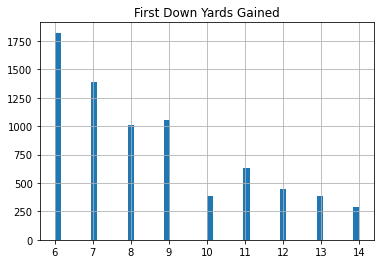

In [33]:
gains_on_first = df.loc[(df['dwn']==1)& (df['ytg']==10) & (df['type']=='RUSH') & (df['yds']<15) & (df['yds']>5),:]
gains_on_first[['yds']].rename(columns={'yds':'First Down Yards Gained'}).hist(bins=50)


We see that indeed players are making some attempt to stop at the nine yard line ... perhaps. Although it could be that the defensive teams also need coaching. Are they trying too hard to stop the player short of the marker? 

In any case, the optimal strategy is to have zero gains of 10 yards and a bigger spike at 9 yard gains. Similarly, there should be fewer 11 yard gains than 12 yard gains but we see the opposite here. 

What about restricting to passing, when (perhaps) there is more control?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcfb50b1b70>]],
      dtype=object)

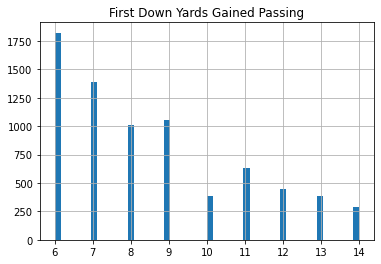

In [34]:
gains_on_first_pass = df.loc[(df['dwn']==1)& (df['ytg']==10) & (df['type']=='RUSH') & (df['yds']<15) & (df['yds']>5),:]
gains_on_first_pass[['yds']].rename(columns={'yds':'First Down Yards Gained Passing'}).hist(bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcfb4ffb400>]],
      dtype=object)

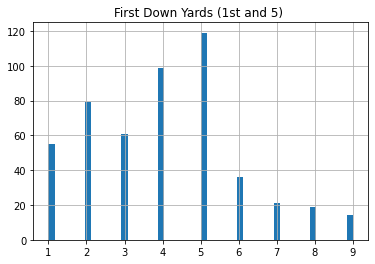

In [36]:
gains_on_first_pass = df.loc[(df['dwn']==1)& (df['ytg']==5) & (df['yds']<10) & (df['yds']>=1),:]
gains_on_first_pass[['yds']].rename(columns={'yds':'First Down Yards (1st and 5) '}).hist(bins=50)

In [38]:
df['got_5'] = df['yds']>=5 
first_and_five = df.loc[(df['dwn']==1)& (df['ytg']==5) & (df['yfog']<50),:]
first_and_five[['got_5']].mean()

got_5    0.419244
dtype: float64

In [43]:
df['got_4'] = df['yds']>=4 
and_four = df.loc[(df['dwn']<=2)& (df['ytg']==4) & (df['yfog']<50),:]
and_four['got_4'].mean()

0.46536523929471035

In [44]:
465/419

1.1097852028639619